# Open Data From JSON

In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
path = 'crawl_json/'
frames = []
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.      
    with open(filename, encoding='utf-8', mode='r') as currentFile:
        frames.append(pd.read_json(currentFile, orient='index'))

df = pd.concat(frames)
df.drop(['authors', 'image_url', 'localpath', 'title_page', 'title_rss'], axis = 1, inplace = True)
df.head(3)

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url
0,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:24:26",It's not like aliens put up a welcome banner o...,en,lightyears.blogs.cnn.com,It's not like aliens put up a welcome banner o...,16 'super-Earths' found outside solar system –...,http://lightyears.blogs.cnn.com/2011/09/13/16-...
1,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:54:08",By Adam Levine Military researchers conducting...,en,security.blogs.cnn.com,By Adam Levine Military researchers conducting...,Lost at sea. Military loses contact with hyper...,http://security.blogs.cnn.com/2011/08/11/new-y...
2,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:09:23",'Devils In The Details' By Sean Hartnett » Mor...,en,newyork.cbslocal.com,'Devils In The Details'By Sean Hartnett» More...,Sean Hartnett: Mutual Admiration Between Stanl...,https://newyork.cbslocal.com/2012/05/30/hartne...


# Amount of articles that will be processed:

In [3]:
len(df["maintext"])

2315

# Preprocessing 

In [4]:
import re

In [50]:
df['id'] = df.index
df.head(3)

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,maintext_prepro,tokenized_words,maintext_nouns,maintext_ready,corpus,id
0,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:24:26",It's not like aliens put up a welcome banner o...,en,lightyears.blogs.cnn.com,It's not like aliens put up a welcome banner o...,16 'super-Earths' found outside solar system –...,http://lightyears.blogs.cnn.com/2011/09/13/16-...,it's not like aliens put up a welcome banner o...,"[It, 's, not, like, aliens, put, up, a, welcom...",alien banner anything scientist planet life So...,"[alien, banner, scientist, planet, life, south...","[(0, 3), (1, 2), (2, 2), (3, 1), (4, 1), (5, 2...",0
1,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:54:08",By Adam Levine Military researchers conducting...,en,security.blogs.cnn.com,By Adam Levine Military researchers conducting...,Lost at sea. Military loses contact with hyper...,http://security.blogs.cnn.com/2011/08/11/new-y...,by adam levine military researchers conducting...,"[By, Adam, Levine, Military, researchers, cond...",Adam Levine Military researcher flight aircraf...,"[adam, levine, military, researcher, flight, a...","[(19, 1), (39, 3), (40, 3), (92, 2), (107, 2),...",1
2,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:09:23",'Devils In The Details' By Sean Hartnett » Mor...,en,newyork.cbslocal.com,'Devils In The Details'By Sean Hartnett» More...,Sean Hartnett: Mutual Admiration Between Stanl...,https://newyork.cbslocal.com/2012/05/30/hartne...,'devils in the details'by sean hartnett» more...,"['Devils, In, The, Details'By, Sean, Hartnett,...",'Devils Details'By Sean Hartnett More Columns ...,"[devils, details, sean, hartnett, columns, dus...","[(19, 1), (57, 1), (199, 1), (275, 2), (292, 1...",2


In [5]:
# Remove punctuation
df['maintext_prepro'] = \
df['maintext'].map(lambda x: re.sub('[,\.!?]', '', x))
# To lowercase
df['maintext_prepro'] = \
df['maintext_prepro'].map(lambda x: x.lower())

In [6]:
import nltk
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nicolas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nicolas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nicolas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
is_noun = lambda pos: pos[:2] == 'NN'
nouns = []

stemmer = WordNetLemmatizer()

df['tokenized_words'] = df['maintext'].apply(nltk.word_tokenize)

for element in df["tokenized_words"]:
        	nouns.append(" ".join([stemmer.lemmatize(word) for (word, pos) in nltk.pos_tag(element) if is_noun(pos) and len(word) > 2]))    # joined as a single string per article

df["maintext_nouns"] = nouns

In [8]:
df.head(3)

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,maintext_prepro,tokenized_words,maintext_nouns
0,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:24:26",It's not like aliens put up a welcome banner o...,en,lightyears.blogs.cnn.com,It's not like aliens put up a welcome banner o...,16 'super-Earths' found outside solar system –...,http://lightyears.blogs.cnn.com/2011/09/13/16-...,it's not like aliens put up a welcome banner o...,"[It, 's, not, like, aliens, put, up, a, welcom...",alien banner anything scientist planet life So...
1,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:54:08",By Adam Levine Military researchers conducting...,en,security.blogs.cnn.com,By Adam Levine Military researchers conducting...,Lost at sea. Military loses contact with hyper...,http://security.blogs.cnn.com/2011/08/11/new-y...,by adam levine military researchers conducting...,"[By, Adam, Levine, Military, researchers, cond...",Adam Levine Military researcher flight aircraf...
2,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:09:23",'Devils In The Details' By Sean Hartnett » Mor...,en,newyork.cbslocal.com,'Devils In The Details'By Sean Hartnett» More...,Sean Hartnett: Mutual Admiration Between Stanl...,https://newyork.cbslocal.com/2012/05/30/hartne...,'devils in the details'by sean hartnett» more...,"['Devils, In, The, Details'By, Sean, Hartnett,...",'Devils Details'By Sean Hartnett More Columns ...


# Word Cloud

In [39]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Word Cloud All Words

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


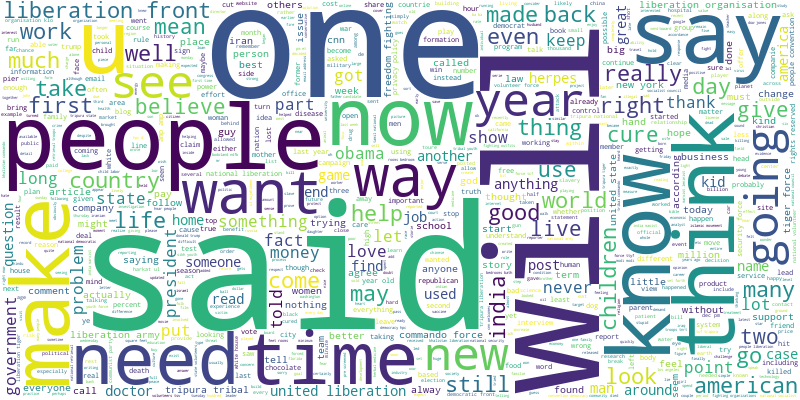

In [40]:
all_articles_string = ','.join(list(df['maintext_prepro'].values))
wordcloud.generate(all_articles_string)

wordcloud.to_image()

# Word Cloud Only Nouns

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


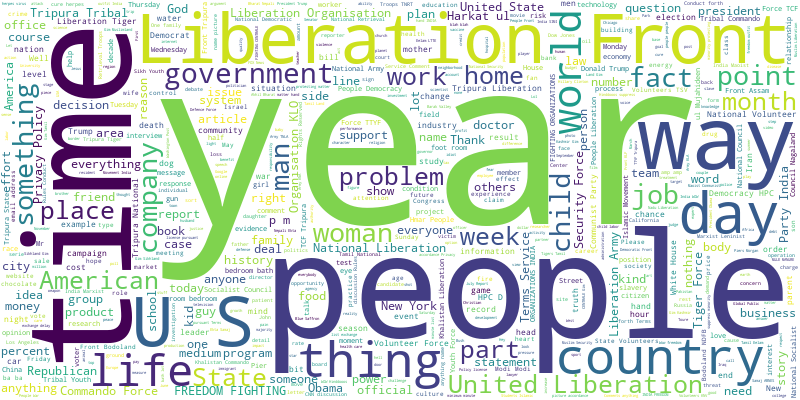

In [41]:
all_articles_nouns = ','.join(list(df['maintext_nouns'].values))
wordcloud.generate(all_articles_nouns)

wordcloud.to_image()

# Prepare data for LDA analysis

In [42]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nicolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
stop_words = stopwords.words('english')
#extend stopwords if desired
stop_words.extend(['subject', 'use', 'http', 'https', 'people', 'thing', 'takipci', 'time', 'year', 'day', 'com', 'cnn', 'front', 'story', 'one', 'two', 'three', 'four', 'five', "six", "seven", "eight", "nine", "ten", "week", "month", "anything", "way", "mr", "mrs", "miss", "issue", "lot", "something", "p", "m", "part"])  


C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
#Tokenize Text
def sentence_to_words(sentences):
    for sent in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(sent, deacc=True))

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
#Remove Stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if (word not in stop_words)] for doc in texts]    #filtering

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
maintext_data = df["maintext_nouns"].values.tolist()
df["maintext_ready"] = list(sentence_to_words(maintext_data))

maintext_ready = remove_stopwords(df["maintext_ready"].tolist())
df["maintext_ready"]  = maintext_ready

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df.head(3)

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,maintext_prepro,tokenized_words,maintext_nouns,maintext_ready
0,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:24:26",It's not like aliens put up a welcome banner o...,en,lightyears.blogs.cnn.com,It's not like aliens put up a welcome banner o...,16 'super-Earths' found outside solar system –...,http://lightyears.blogs.cnn.com/2011/09/13/16-...,it's not like aliens put up a welcome banner o...,"[It, 's, not, like, aliens, put, up, a, welcom...",alien banner anything scientist planet life So...,"[alien, banner, scientist, planet, life, south..."
1,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:54:08",By Adam Levine Military researchers conducting...,en,security.blogs.cnn.com,By Adam Levine Military researchers conducting...,Lost at sea. Military loses contact with hyper...,http://security.blogs.cnn.com/2011/08/11/new-y...,by adam levine military researchers conducting...,"[By, Adam, Levine, Military, researchers, cond...",Adam Levine Military researcher flight aircraf...,"[adam, levine, military, researcher, flight, a..."
2,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:09:23",'Devils In The Details' By Sean Hartnett » Mor...,en,newyork.cbslocal.com,'Devils In The Details'By Sean Hartnett» More...,Sean Hartnett: Mutual Admiration Between Stanl...,https://newyork.cbslocal.com/2012/05/30/hartne...,'devils in the details'by sean hartnett» more...,"['Devils, In, The, Details'By, Sean, Hartnett,...",'Devils Details'By Sean Hartnett More Columns ...,"[devils, details, sean, hartnett, columns, dus..."


# Create the Corpus

In [19]:
import gensim.corpora as corpora

In [20]:
data = df["maintext_ready"].tolist()

word_dictionary = corpora.Dictionary(data)

corpus = [word_dictionary.doc2bow(text) for text in data]   #create the corpus

df["corpus"] = corpus

In [21]:
df.head(3)

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,maintext_prepro,tokenized_words,maintext_nouns,maintext_ready,corpus
0,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:24:26",It's not like aliens put up a welcome banner o...,en,lightyears.blogs.cnn.com,It's not like aliens put up a welcome banner o...,16 'super-Earths' found outside solar system –...,http://lightyears.blogs.cnn.com/2011/09/13/16-...,it's not like aliens put up a welcome banner o...,"[It, 's, not, like, aliens, put, up, a, welcom...",alien banner anything scientist planet life So...,"[alien, banner, scientist, planet, life, south...","[(0, 3), (1, 2), (2, 2), (3, 1), (4, 1), (5, 2..."
1,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:54:08",By Adam Levine Military researchers conducting...,en,security.blogs.cnn.com,By Adam Levine Military researchers conducting...,Lost at sea. Military loses contact with hyper...,http://security.blogs.cnn.com/2011/08/11/new-y...,by adam levine military researchers conducting...,"[By, Adam, Levine, Military, researchers, cond...",Adam Levine Military researcher flight aircraf...,"[adam, levine, military, researcher, flight, a...","[(19, 1), (39, 3), (40, 3), (92, 2), (107, 2),..."
2,"07/01/2021, 09:19:36","07/01/2021, 09:19:36","12/06/2019, 03:09:23",'Devils In The Details' By Sean Hartnett » Mor...,en,newyork.cbslocal.com,'Devils In The Details'By Sean Hartnett» More...,Sean Hartnett: Mutual Admiration Between Stanl...,https://newyork.cbslocal.com/2012/05/30/hartne...,'devils in the details'by sean hartnett» more...,"['Devils, In, The, Details'By, Sean, Hartnett,...",'Devils Details'By Sean Hartnett More Columns ...,"[devils, details, sean, hartnett, columns, dus...","[(19, 1), (57, 1), (199, 1), (275, 2), (292, 1..."


# Build a LDA model (need to find fitting values here)

In [22]:
from pprint import pprint   #pretty printing

In [23]:
amount_of_topics = 10  #adjust to find good results

In [24]:
lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = word_dictionary, num_topics = amount_of_topics)   #build the LDA model

# Displaying the LDA model

In [25]:
pprint(lda_model.print_topics())
articles_lda = lda_model[corpus]

[(0,
  '0.014*"liberation" + 0.013*"force" + 0.009*"tripura" + 0.007*"national" + '
  '0.005*"united" + 0.005*"india" + 0.004*"army" + 0.003*"party" + '
  '0.003*"council" + 0.003*"tribal"'),
 (1,
  '0.007*"force" + 0.007*"liberation" + 0.006*"tripura" + 0.005*"national" + '
  '0.004*"house" + 0.004*"president" + 0.004*"state" + 0.003*"company" + '
  '0.003*"world" + 0.003*"country"'),
 (2,
  '0.004*"force" + 0.004*"national" + 0.004*"liberation" + 0.004*"child" + '
  '0.004*"life" + 0.004*"tripura" + 0.003*"world" + 0.003*"trump" + '
  '0.003*"president" + 0.003*"united"'),
 (3,
  '0.005*"force" + 0.004*"world" + 0.004*"president" + 0.003*"country" + '
  '0.003*"tripura" + 0.003*"liberation" + 0.003*"national" + 0.003*"united" + '
  '0.003*"obama" + 0.003*"party"'),
 (4,
  '0.006*"dec" + 0.005*"world" + 0.004*"india" + 0.004*"force" + 0.003*"game" '
  '+ 0.003*"family" + 0.003*"national" + 0.003*"child" + 0.003*"woman" + '
  '0.003*"news"'),
 (5,
  '0.007*"liberation" + 0.006*"herpes"

# Visualize the LDA model for further analysis (needed to find the best values to adjust)

In [26]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
from IPython.display import HTML, display

pyLDAvis.enable_notebook()

In [27]:
LDAvis_data_filepath = os.path.join('./lda_results/ldavis_data_'+str(amount_of_topics)+'topics')

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, word_dictionary)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

#load pre-prepared pyLDAvis data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_data = pickle.load(f)
pyLDAvis.save_html(LDAvis_data, './lda_results/ldavis_data_'+ str(amount_of_topics) +'topics.html')
LDAvis_data #show the data

C:\Users\Nicolas\anaconda3\envs\kcc\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.006359  0.011526       1        1  14.123052
0     -0.030998  0.004214       2        1  13.975091
3      0.006977 -0.002706       3        1  13.422561
4      0.019479  0.016512       4        1  10.463556
2      0.005327  0.000871       5        1  10.450157
6      0.025784 -0.011875       6        1  10.145136
1     -0.007392 -0.011549       7        1   8.918599
5     -0.005025  0.002027       8        1   8.701799
9     -0.001349 -0.010772       9        1   6.307343
7     -0.019161  0.001754      10        1   3.492705, topic_info=            Term         Freq        Total Category  logprob  loglift
4664  liberation  6170.000000  6170.000000  Default  30.0000  30.0000
696        force  6702.000000  6702.000000  Default  29.0000  29.0000
8714     tripura  4861.000000  4861.000000  Default  28.0000  28.0000
435          dec  1244.000000  1244.000000  Default  27.0000  27.0000
3037    national  4771.000000  4771.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1291       party    88.347812  2372.412945  Topic10  -6.0530   0.0641
1223        news    84.386102  2370.774321  Topic10  -6.0989   0.0189
386      country    94.212474  3538.253972  Topic10  -5.9888  -0.2713
1351       point    76.293567  1773.021328  Topic10  -6.1997   0.2086
5061      herpes    75.107766  2431.719860  Topic10  -6.2154  -0.1229

[850 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
18637      6  0.641098         abaygo
18637      7  0.213699         abaygo
38841      9  0.441867  accelerometer
29796      1  0.090656       ackerman
29796      2  0.543937       ackerman
...      ...       ...            ...
53192      4  0.240492     欣赏一周精彩纷呈图片
53192      5  0.060123     欣赏一周精彩纷呈图片
53192      6  0.120246     欣赏一周精彩纷呈图片
53192      8  0.060123     欣赏一周精彩纷呈图片
53192      9  0.300615     欣赏一周精彩纷呈图片

[3078 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 4, 5, 3, 7, 2, 6, 10, 8])

# Store Clusters

In [ ]:
def topics_per_document(model, corpus, start=0, end=1):
    